# Import Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Scraping data from website

## Setup connection

In [2]:
#scrape a single game shots
url = 'https://understat.com/match/16753'

In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [4]:
#get only the shotsData
strings = scripts[1].string


In [5]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22477897\\x22,\\x22minute\\x22\\x3A\\x224\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.875\\x22,\\x22Y\\x22\\x3A\\x220.47400001525878904\\x22,\\x22xG\\x22\\x3A\\x220.0188495721668005\\x22,\\x22player\\x22\\x3A\\x22Joel\\x20Matip\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22332\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222021\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x2216753\\x22,\\x22h_team\\x22\\x3A\\x22Liverpool\\x22,\\x22a_team\\x22\\x3A\\x22Wolverhampton\\x20Wanderers\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222022\\x2D05\\x2D22\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Luis\\x20D\\x5Cu00edaz\\x22,\\x22lastAction\\x22\\x3A\\x22Aerial\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22477898\\x22,\\x22minute\\x22\\x3A\\x229\\x22,\\x22result

In [6]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')


In [7]:
#convert string to json format
data = json.loads(json_data)


In [8]:
data

{'h': [{'id': '477897',
   'minute': '4',
   'result': 'MissedShots',
   'X': '0.875',
   'Y': '0.47400001525878904',
   'xG': '0.0188495721668005',
   'player': 'Joel Matip',
   'h_a': 'h',
   'player_id': '332',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'Head',
   'match_id': '16753',
   'h_team': 'Liverpool',
   'a_team': 'Wolverhampton Wanderers',
   'h_goals': '3',
   'a_goals': '1',
   'date': '2022-05-22 15:00:00',
   'player_assisted': 'Luis Díaz',
   'lastAction': 'Aerial'},
  {'id': '477898',
   'minute': '9',
   'result': 'MissedShots',
   'X': '0.9119999694824219',
   'Y': '0.5990000152587891',
   'xG': '0.274485319852829',
   'player': 'Luis Díaz',
   'h_a': 'h',
   'player_id': '10408',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'RightFoot',
   'match_id': '16753',
   'h_team': 'Liverpool',
   'a_team': 'Wolverhampton Wanderers',
   'h_goals': '3',
   'a_goals': '1',
   'date': '2022-05-22 15:00:00',
   'player_assisted': 'Joel M

In [9]:
# Structured data into table
x = []
y = []
minutes = [] 
xG = []
result = []
player = []
team = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'minute':
            minutes.append(data_home[index][key])    
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'minute':
            minutes.append(data_away[index][key]) 
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])

In [10]:
# Convert table into dataframe
col_names = ['x','y','minutes','team','xG','player','result']
df = pd.DataFrame([x,y,minutes,team,xG,player,result],index=col_names)
df = df.T

dataf = pd.DataFrame.from_dict(df)
dataf.head()

,x,y,minutes,team,xG,player,result
0,0.875,0.47400001525878904,4,Liverpool,0.0188495721668005,Joel Matip,MissedShots
1,0.9119999694824219,0.5990000152587891,9,Liverpool,0.274485319852829,Luis Díaz,MissedShots
2,0.924000015258789,0.43099998474121093,12,Liverpool,0.08718594908714294,Naby Keita,BlockedShot
3,0.9490000152587891,0.57,13,Liverpool,0.04879196360707283,Joel Matip,MissedShots
4,0.8730000305175781,0.47900001525878905,14,Liverpool,0.10000427067279816,Diogo Jota,BlockedShot


In [11]:
dataf.shape

(36, 7)

In [12]:
# convert just columns "x", "y", "minutes" and "xG"
dataf[["x", "y", "minutes", "xG" ]] = dataf[["x", "y", "minutes", "xG"]].apply(pd.to_numeric)

In [13]:
dataf[dataf['result']=='Goal'].sort_values('minutes')

,x,y,minutes,team,xG,player,result
29,0.929,0.555,2,Wolverhampton Wanderers,0.473709,Pedro Neto,Goal
5,0.883,0.585,23,Liverpool,0.349071,Sadio Mané,Goal
24,0.978,0.542,83,Liverpool,0.691987,Mohamed Salah,Goal
26,0.954,0.587,88,Liverpool,0.472129,Andrew Robertson,Goal


In [14]:
dataf.describe()

,x,y,minutes,xG
count,36.000000,36.000000,36.000000,36.000000
mean,0.868556,0.487417,52.194444,0.119765
std,0.061956,0.108894,29.236786,0.154131
min,0.732000,0.279000,2.000000,0.013988
25%,0.843500,0.402250,27.000000,0.034442
50%,0.879000,0.498000,59.500000,0.060740
75%,0.912000,0.573000,79.000000,0.101786
max,0.978000,0.681000,92.000000,0.691987


In [15]:
dataf['x'] = dataf['x']*120
dataf['y'] = dataf['y']*80

Text(2, 78, 'Liverpool VS Wolverhampton Wanderers\nMatch Day: May 22, 2022\nStadium: Anfield')

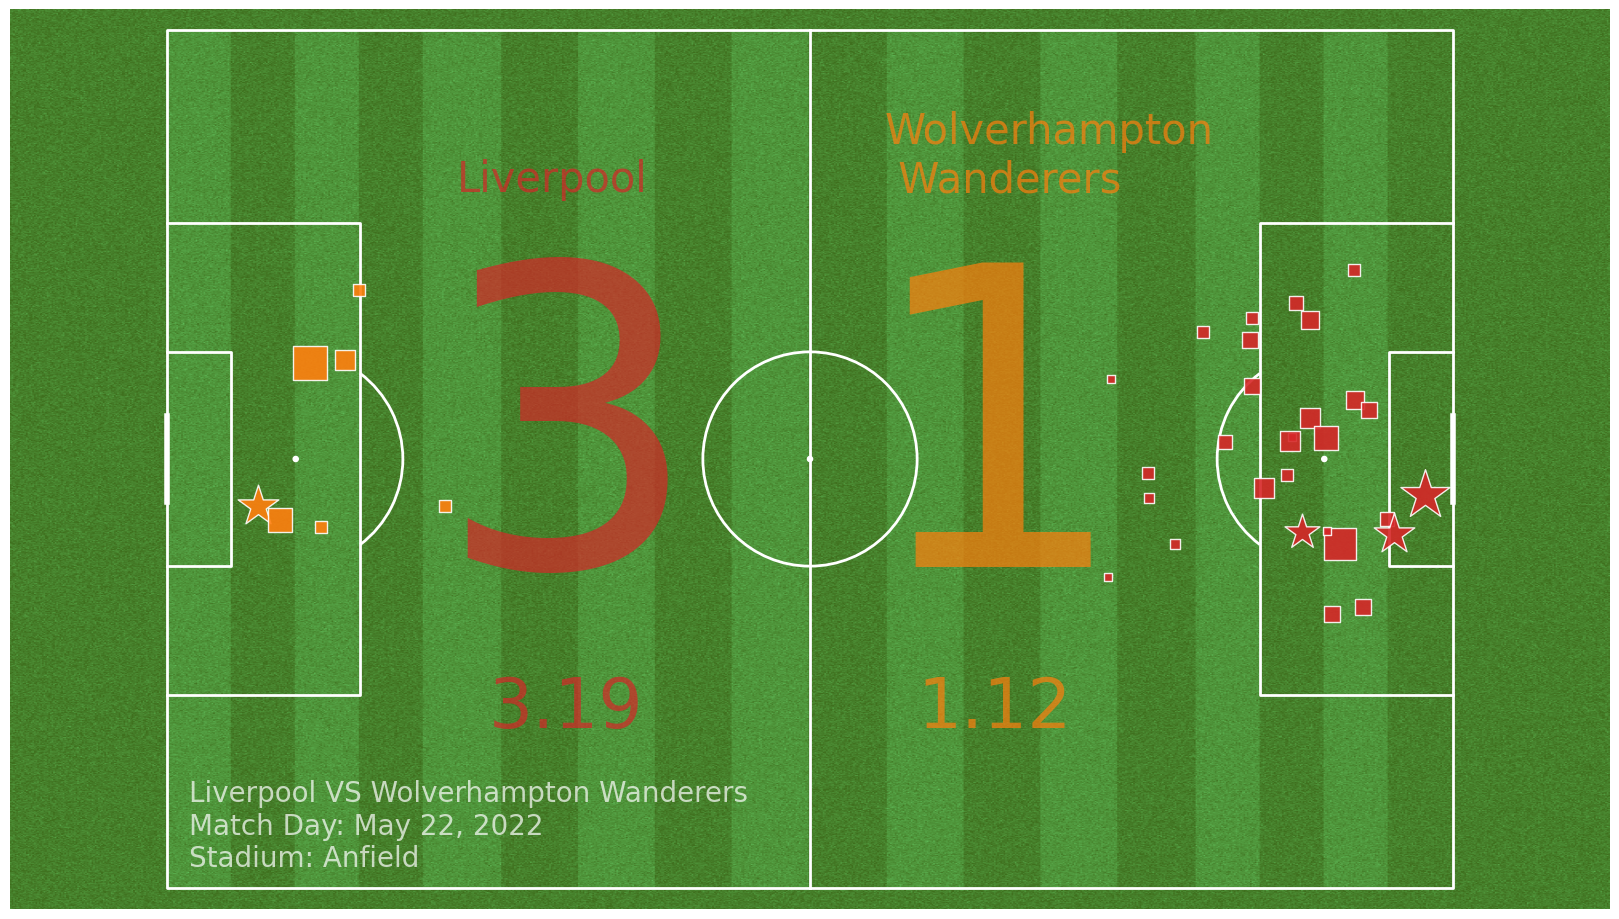

In [16]:
FIGWIDTH = 16
FIGHEIGHT = 9
NROWS = 1
NCOLS = 1
MAX_GRID = 1

# here we setup the padding to get a 16:9 aspect ratio for the axis
# note 80 is the StatsBomb width and 120 is the StatsBomb length
# this will extend the (axis) grassy effect to the figure edges
PAD_TOP = 2
PAD_BOTTOM = 2
PAD_SIDES = (((80 + PAD_BOTTOM + PAD_TOP) * FIGWIDTH / FIGHEIGHT) - 120) / 2
pitch = Pitch(pad_top=PAD_TOP, pad_bottom=PAD_BOTTOM,
              pad_left=PAD_SIDES, pad_right=PAD_SIDES,
              pitch_color='grass', stripe=True, line_color='white')

# calculate the maximum grid_height/ width
GRID_WIDTH, GRID_HEIGHT = pitch.grid_dimensions(figwidth=FIGWIDTH, figheight=FIGHEIGHT,
                                                nrows=NROWS, ncols=NCOLS,
                                                max_grid=1, space=0)

# define shot map
# specify the shot marker using STAR for goal, otherwise square
# size of the marker depends on xG
def Shotmap():
    for x in range(len(dataf['x'])):
        if dataf['team'][x] == 'Liverpool':
            if dataf['result'][x] == 'Goal':
                plt.scatter(dataf['x'][x], dataf['y'][x], c='tab:red', s = round(dataf['xG'][x]*2000), marker = '*', edgecolor='white', alpha=0.9 )
            else:
                plt.scatter(dataf['x'][x], dataf['y'][x], c='tab:red', s = round(dataf['xG'][x]*2000), marker = ',', edgecolor='white', alpha=0.9 )
        else:
            if dataf['result'][x] == 'Goal':
                plt.scatter(120-(dataf['x'][x]), dataf['y'][x], c='tab:orange', s = round(dataf['xG'][x]*2000), marker = '*', edgecolor='white', alpha=0.9 )
            else: 
                plt.scatter(120-(dataf['x'][x]), dataf['y'][x], c='tab:orange', s = round(dataf['xG'][x]*2000), marker = ',', edgecolor='white', alpha=0.9 )


# plot
fig, ax = pitch.grid(figheight=FIGHEIGHT, grid_width=GRID_WIDTH, grid_height=GRID_HEIGHT,
                     title_height=0, endnote_height=0)

# plot the shot on goal mapping
Shotmap()

# club name
plt.text(27, 15, 'Liverpool', fontsize= 30, c='tab:red', alpha=0.7)
plt.text(67, 15, 'Wolverhampton\n Wanderers', fontsize= 30, c='tab:orange', alpha=0.7)

# Final Score
plt.text(25, 50, '3', fontsize=300, c='tab:red', alpha=0.7)
plt.text(65, 50, '1', fontsize=300, c='tab:orange', alpha=0.7)

# Total expected goal (xG) for both teams
plt.text(30, 65, dataf[dataf['team']=='Liverpool']['xG'].sum().round(2) , fontsize=50, c='tab:red', alpha=0.7)
plt.text(70, 65, dataf[dataf['team']=='Wolverhampton Wanderers']['xG'].sum().round(2) , fontsize=50, c='tab:orange', alpha=0.7)

plt.text(2, 78, 'Liverpool VS Wolverhampton Wanderers\nMatch Day: May 22, 2022\nStadium: Anfield', fontsize=20, c='white', alpha=0.7)


In [17]:
# Plot Timing Chart

# Cumulative sum of xG
dataf['cumsum_xG'] = dataf.groupby(['team'])['xG'].cumsum()
dataf.head()

,x,y,minutes,team,xG,player,result,cumsum_xG
0,105.000000,37.920001,4,Liverpool,0.018850,Joel Matip,MissedShots,0.018850
1,109.439996,47.920001,9,Liverpool,0.274485,Luis Díaz,MissedShots,0.293335
2,110.880002,34.479999,12,Liverpool,0.087186,Naby Keita,BlockedShot,0.380521
3,113.880002,45.600000,13,Liverpool,0.048792,Joel Matip,MissedShots,0.429313
4,104.760004,38.320001,14,Liverpool,0.100004,Diogo Jota,BlockedShot,0.529317


In [18]:
df1 = dataf[['minutes', 'result','cumsum_xG']]
dataf_goal = df1[df1['result']=='Goal']
dataf_goal

,minutes,result,cumsum_xG
5,23,Goal,0.878388
24,83,Goal,2.447308
26,88,Goal,3.061823
29,2,Goal,0.473709


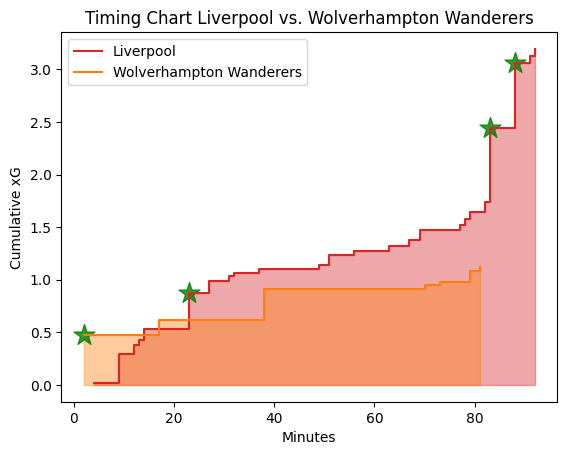

In [19]:
dataf_liv = dataf[dataf['team']=='Liverpool']
dataf_wolves = dataf[dataf['team']=='Wolverhampton Wanderers']

# Liverpool
plt.fill_between(dataf_liv['minutes'], dataf_liv['cumsum_xG'], step="post", alpha=0.4, color= 'tab:red')
plt.plot(dataf_liv['minutes'], dataf_liv['cumsum_xG'], drawstyle="steps-post", color= 'tab:red', label='Liverpool')
#plt.scatter(dataf_liv['minutes'], dataf_liv['cumsum_xG'], marker='*', color='red')

# Wolverhampton Wanderers
plt.fill_between(dataf_wolves['minutes'], dataf_wolves['cumsum_xG'], step="post", alpha=0.4, color= 'tab:orange')
plt.plot(dataf_wolves['minutes'], dataf_wolves['cumsum_xG'], drawstyle="steps-post", color= 'tab:orange', label='Wolverhampton Wanderers')

plt.scatter(dataf_goal['minutes'], dataf_goal['cumsum_xG'], marker="*", s=250, c='green', alpha=0.8)

plt.ylabel('Cumulative xG')
plt.xlabel('Minutes')
plt.title('Timing Chart Liverpool vs. Wolverhampton Wanderers')
plt.legend()